# Imporing Library

In [11]:
import warnings
warnings.filterwarnings("ignore")

import warnings: This line imports the warnings module, which is a standard Python module used to handle warnings that can be generated during the execution of a program.

warnings.filterwarnings("ignore"): This line sets up a filter to ignore (suppress) all warning messages generated by Python during the execution of your code.

In [12]:
import os

# Get the number of CPU cores
num_cores = os.cpu_count()

print(f"Number of CPU cores: {num_cores}")

Number of CPU cores: 2


In [13]:
import sys
if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import sys: This imports the Python sys module, which provides access to various system-specific parameters and functions.

!pip install -q dtreeviz: If the code is running in Google Colab, it uses the ! syntax to run a shell command inside Colab's environment. In this case, it's using pip to install the dtreeviz package with the -q flag, which makes the installation process quiet (no verbose output).

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Loading

In [18]:
# Load your dataset
file_path = '/content/IMDb Movies India.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

Specify the Encoding: You can specify the encoding explicitly when reading the CSV file using the encoding parameter.

In [19]:
# Explore the dataset
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [20]:
data.shape

(15509, 10)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [22]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [23]:
# Check missing values in columns
data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


# Data Preprocessing


In [24]:
# Check for how many missing values is there
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [25]:
percentage = data.isnull().sum()*100/len(data)
percentage

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

<Axes: >

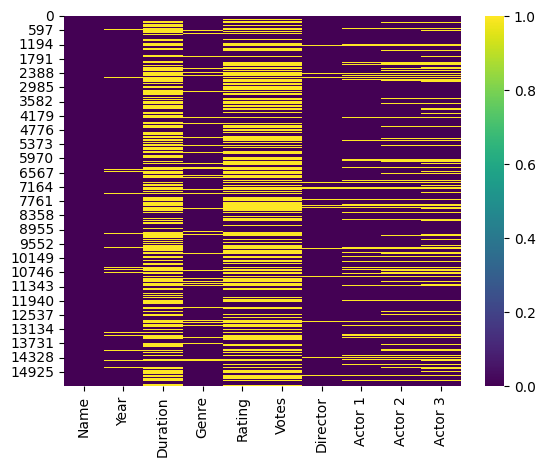

In [26]:
sns.heatmap(data.isnull(),cmap='viridis')

plot shows around 53% values is missing in Duration column and missing value of Rating and Votes is around 49%. So, leter drop the Duration column.

In [27]:
data = pd.DataFrame(data)

# Remove special characters from the 'Name' column
data['Name'] = data['Name'].str.replace(r'[^a-zA-Z0-9\s]', '')
data['Year'] = data['Year'].str.extract(r'\((\d{4})\)').astype(float)
data['Duration'] = data['Duration'].str.extract(r'(\d+)').astype(float)
data['Votes'] = data['Votes'].str.extract(r'(\d+)').astype(float)

In [28]:
data['Rating'].fillna(data['Rating'].mean(), inplace=True)
data['Duration'].fillna(data['Duration'].mean(), inplace=True)
data['Year'].fillna(data['Year'].mean(), inplace=True)
data['Votes'].fillna(data['Votes'].mean(), inplace=True)

<Axes: >

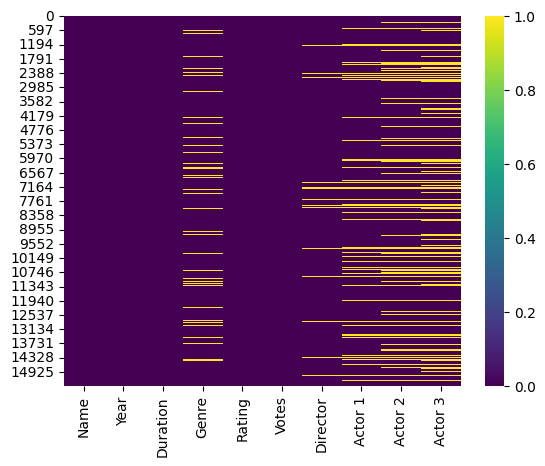

In [29]:
sns.heatmap(data.isnull(),cmap='viridis')

Remove all the missing values from the Dataset

# Data Visualization

<Figure size 1200x600 with 0 Axes>

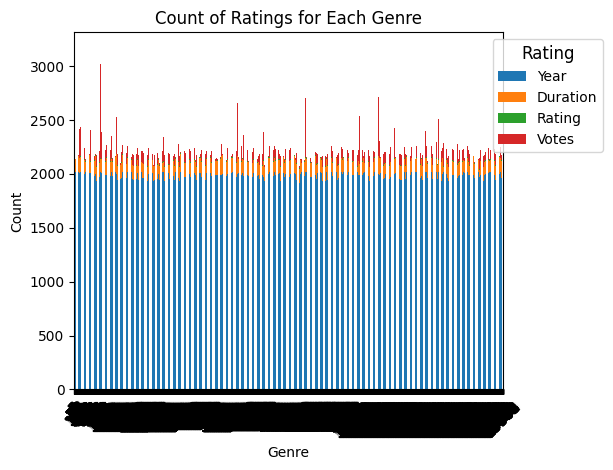

In [30]:
# Plotting the count of ratings for each genre
plt.figure(figsize=(12, 6))
data.plot(kind='bar', stacked=True)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Ratings for Each Genre')
plt.legend(title='Rating', title_fontsize='12', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

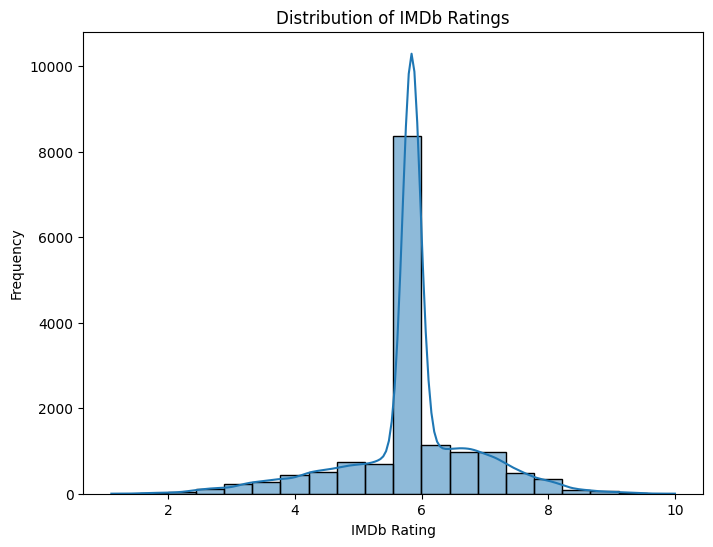

In [31]:
# Plotting the distribution of movie ratings
plt.figure(figsize=(8, 6))
sns.histplot(data["Rating"], bins=20, kde=True)
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.title("Distribution of IMDb Ratings")
plt.show()

# Feature Engineering

Convert categorical variables to numerical using label encoding

In [32]:
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data['Director'] = label_encoder.fit_transform(data['Director'])
data['Actor 1'] = label_encoder.fit_transform(data['Actor 1'])
data['Actor 2'] = label_encoder.fit_transform(data['Actor 2'])
data['Actor 3'] = label_encoder.fit_transform(data['Actor 3'])

# Split the Data into Training and Testing Sets

Define the target variable

In [33]:
X = data[['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']

Split the dataset into training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model Using Linear Regression

In [35]:
linearregression_model = LinearRegression()
linearregression_model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = linearregression_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [37]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.6033024703792166
Mean Squared Error: 0.9475063193234632
Root Mean Squared Error: 0.973399362709604
R-squared: 0.015554707609895746


# Hyperparameter Tuning

In [38]:
# Define a set of hyperparameters and their possible values for tuning
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use mean squared error as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'copy_X': True, 'fit_intercept': True}


In [39]:
# Evaluate the best model on the test set
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (Best Model):", mae)
print(f"Mean Squared Error with Best Model: {mse}")
print("Root Mean Squared Error:", rmse)
print(f"R-squared with Best Model: {r2}")

Mean Absolute Error (Best Model): 0.6033024703792166
Mean Squared Error with Best Model: 0.9475063193234632
Root Mean Squared Error: 0.973399362709604
R-squared with Best Model: 0.015554707609895746
